# Comunicados Banxico

In [73]:
import numpy as np
from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 4)

In [75]:
days = np.array([56., 35., 35., 56., 53., 38., 49., 49., 12., 30., 48., 56., 42.,
       49., 49., 28., 56., 49., 49., 35., 49., 49., 42., 35., 56., 63.,
       35., 35., 42., 63., 42., 35., 49., 49., 49., 42., 49., 42.])

Queremos modelar el número de días de un siguiente comunicado. Asumimos que el número de días entre un comunicado y el siguiente son independientes e identicamente distribuidos $\text{pois}(\lambda)$

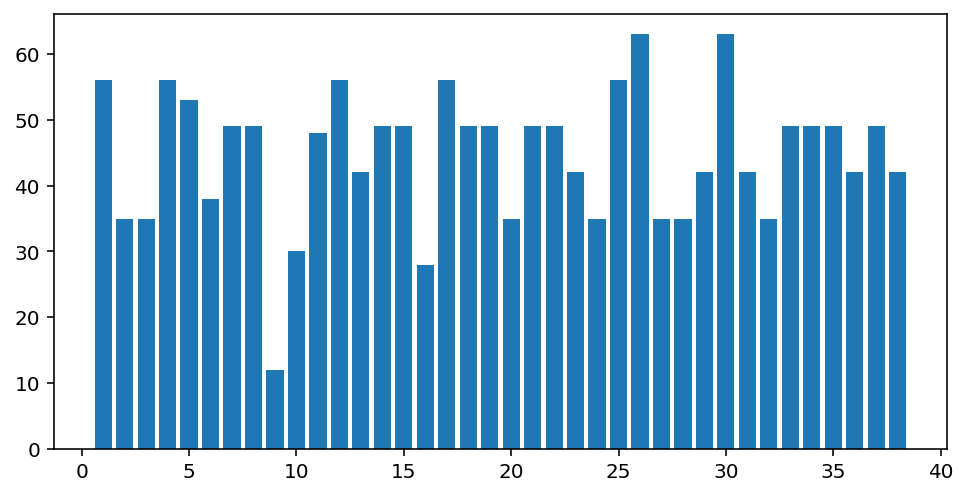

In [76]:
x = np.ones_like(days).cumsum()
plt.bar(x, days);

A fin de logar esto, modelaremos la tasa del comunicado $\lambda$ como una distribución Gamma.
A priori, asumiremos que un comunicado se da una vez cada quince días. Esto puede traducirse a una distribución Gamma

$$
 \text{Gamma}(x | \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1}\exp(-\beta x)}{\Gamma(\alpha)}
$$

con $\alpha_0 = 30$, $\beta_0 = 1$, i.e, asumimos 30 días entre cada comunicado

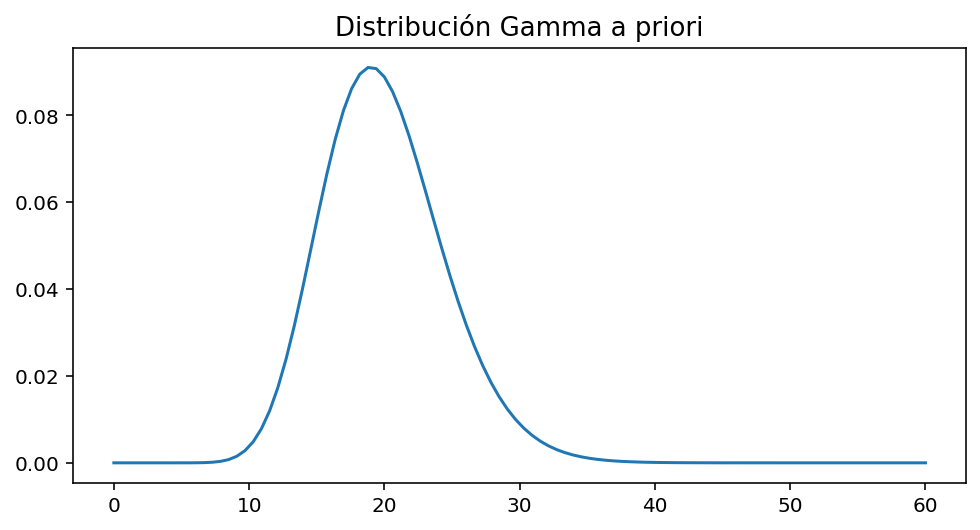

In [96]:
x = np.linspace(0, 60, 100)
alpha, beta = 20, 1
prior_l = alpha / beta
prior = gamma(a=alpha, scale=1/beta)
plt.plot(x, prior.pdf(x))
plt.title("Distribución Gamma a priori", fontsize=13);

La distribución a posteriori conjugada de una variable aleatoria Gamma con verosimilitud poisson está dada por

$$
    p(x | {\bf D}) = \text{Gamma}\left(\alpha + \sum_{n=1}^N x_n, \beta + N\right)
$$

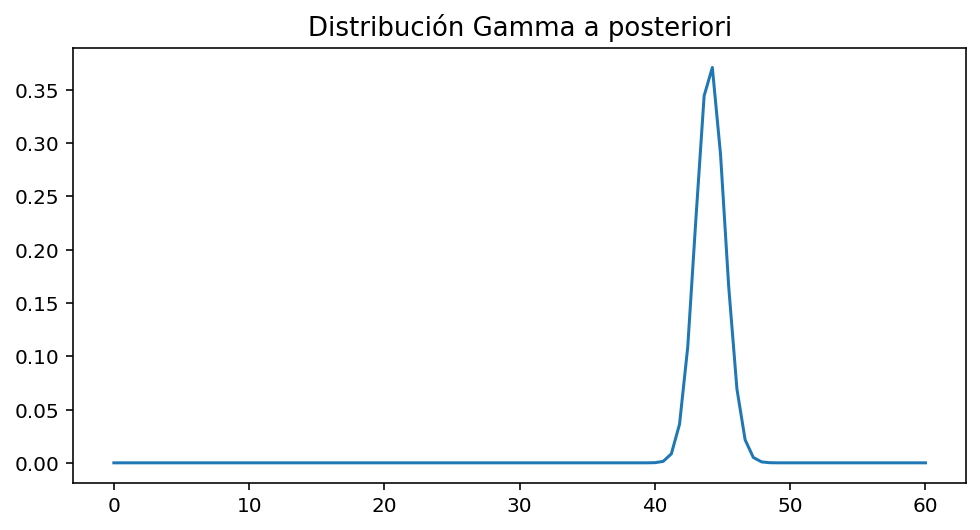

In [97]:
alpha = alpha + days.sum()
beta = beta + len(days)
posterior = gamma(a=alpha, scale=1/beta)
plt.plot(x, posterior.pdf(x))
plt.title("Distribución Gamma a posteriori", fontsize=13);

## Distribuciones de Versosimilitud

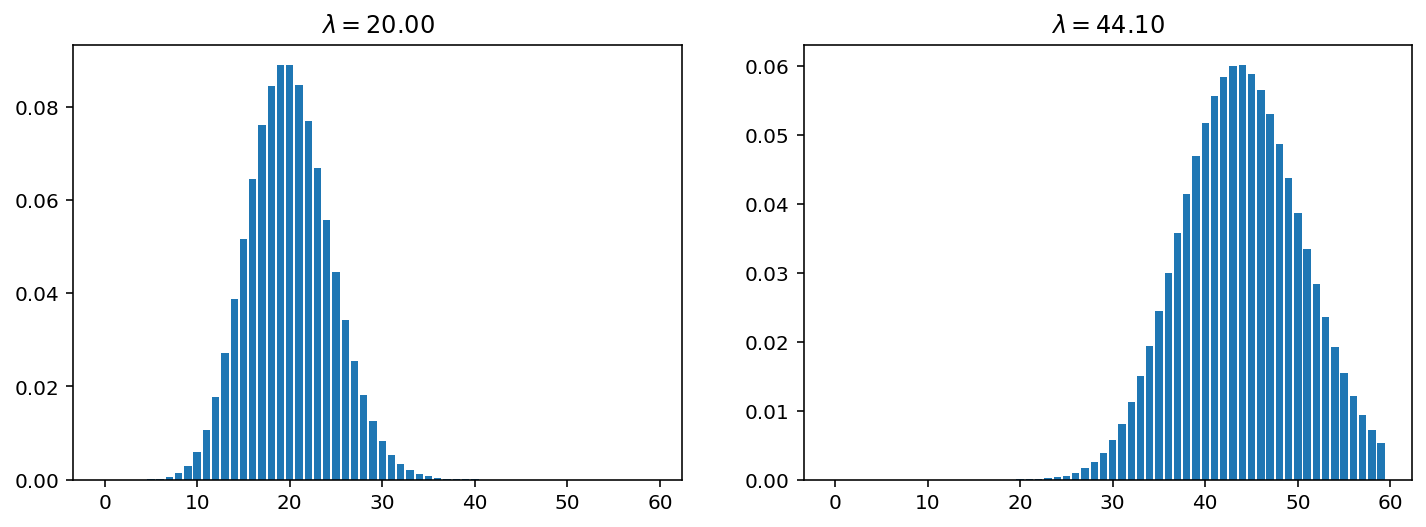

In [99]:
posterior_l = alpha / beta

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for axi, l in zip(ax, [prior_l, posterior_l]):
    ppois = poisson(mu=l)
    x = np.arange(0, 60)
    axi.set_title(r"$\lambda=$" f"{l:0.2f}")
    axi.bar(x, ppois.pmf(x))

In [100]:
ppois = poisson(mu=posterior_l)

1. Calcula la probabilidad de que pasen menos de 40 días entre dos comunicados

In [101]:
ppois.cdf(40)

0.2999313809898425

2. Calcula la probabilidad de que pasen más de 25 días entre dos comunicados

In [102]:
1 - ppois.cdf(40)

0.7000686190101575

2. Calcula la probabilidad de que pasen entre 30 y 50 días entre dos comunicados

In [103]:
ppois.cdf(50) - ppois.cdf(30)

0.8169138492950044

4. Calcula el valor esperado entre cualesquiera dos comunicados

In [104]:
ppois.expect()

44.10256410256425

## Simulando un Proceso Poisson

In [43]:
from numpy.random import poisson

<BarContainer object of 38 artists>

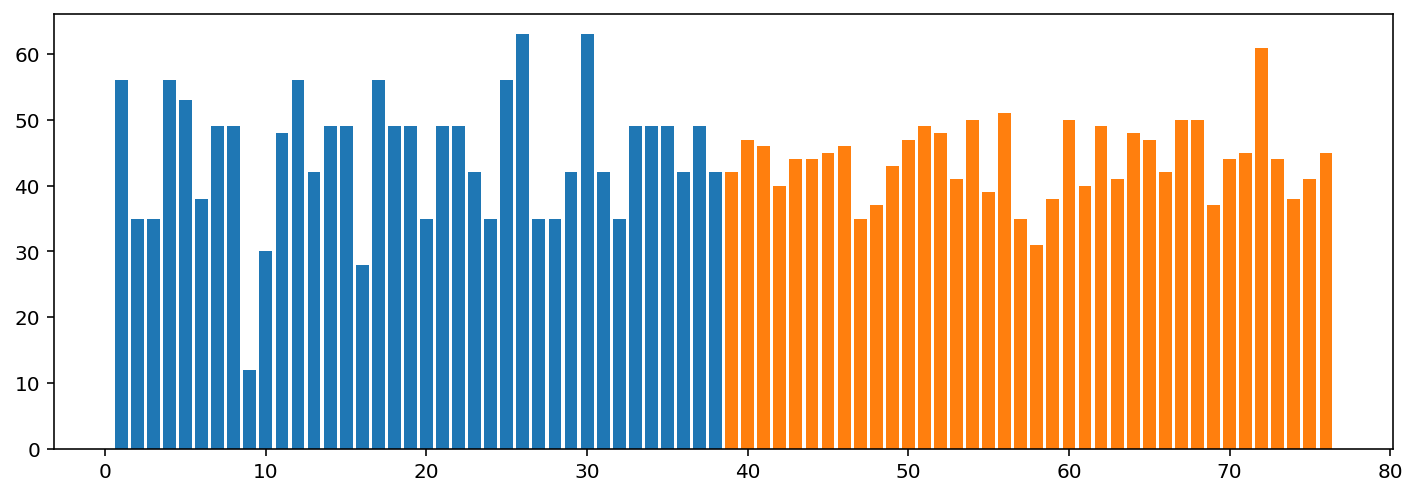

In [51]:
days_simul = poisson(lam=posterior_l, size=len(days))

x = np.ones_like(days_simul).cumsum()
plt.figure(figsize=(12, 4))
plt.bar(x, days);
plt.bar(x + len(x), days_simul)